In [1]:
!nvidia-smi

Thu Jun 19 08:53:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4ldwnNYlZLSegigFSAII")
project = rf.workspace("nithin-cjdhj").project("food-detection-nlusn-kpxm2")
version = project.version(1)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FOOD-DETECTION-1 in yolov11:: 100%|██████████| 18686/18686 [00:02<00:00, 6547.44it/s]


In [6]:
dataset.location

'/content/FOOD-DETECTION-1'

In [8]:
!yolo task=detect mode=train data=/content/FOOD-DETECTION-1/data.yaml model=yolo11n.pt epochs=20 imgsz=640


Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/FOOD-DETECTION-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

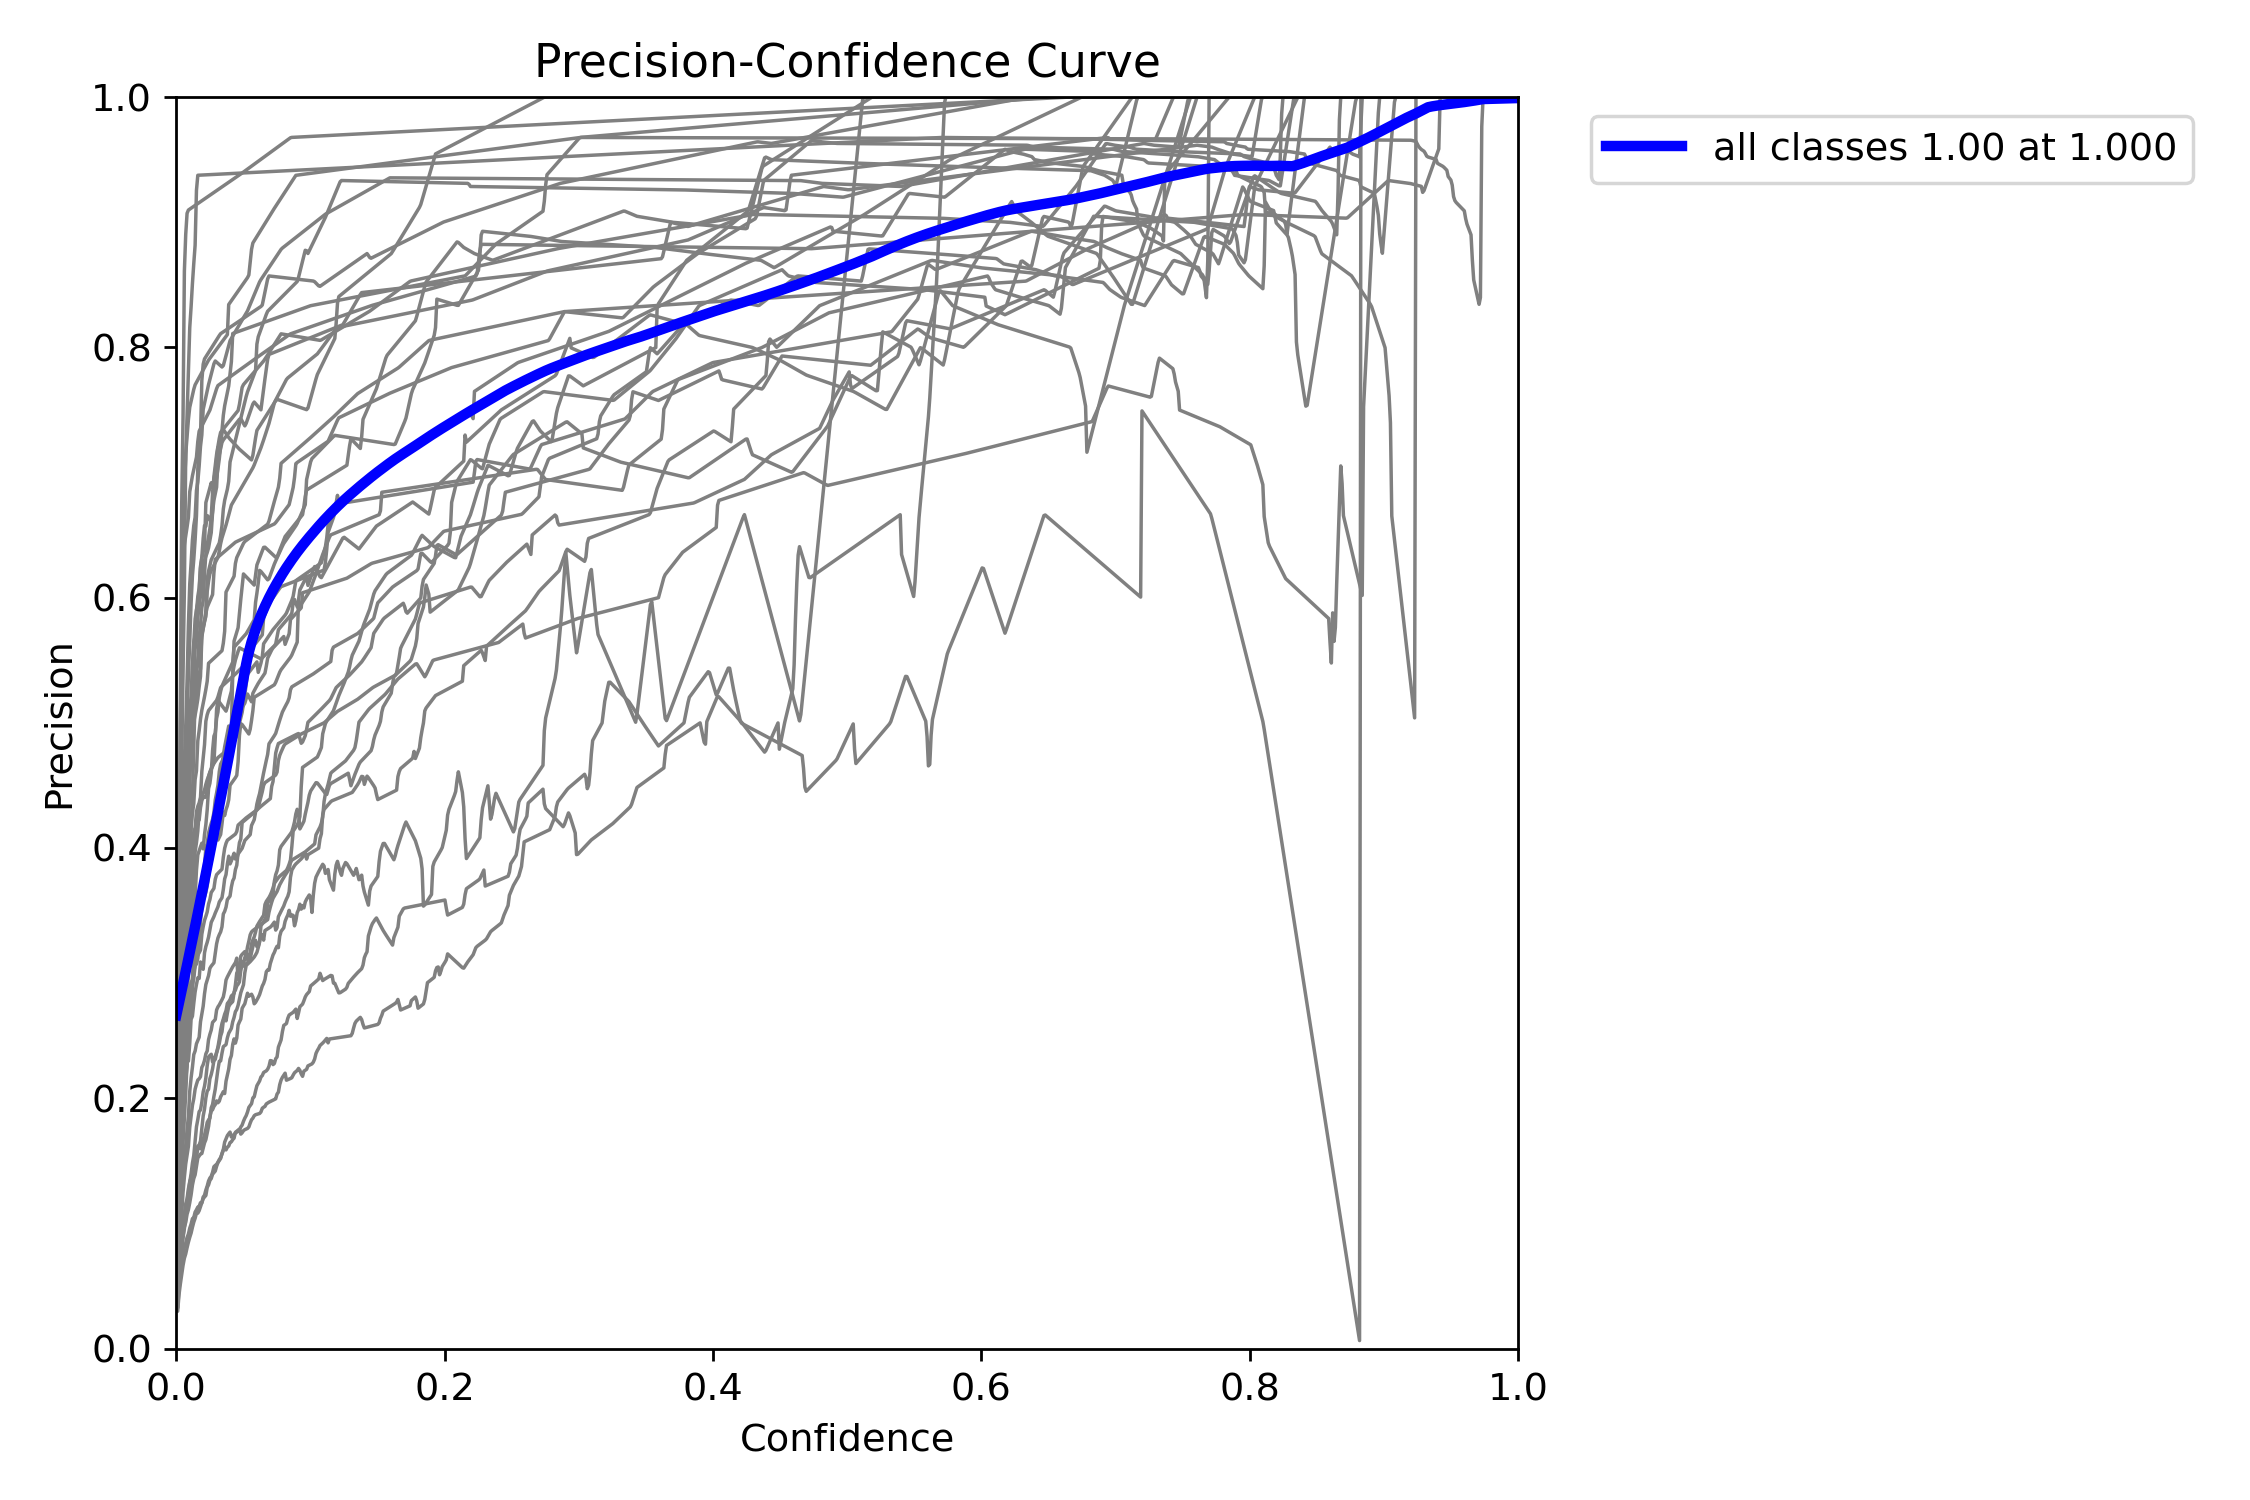

In [10]:
Image("/content/runs/detect/train2/P_curve.png", width=600)

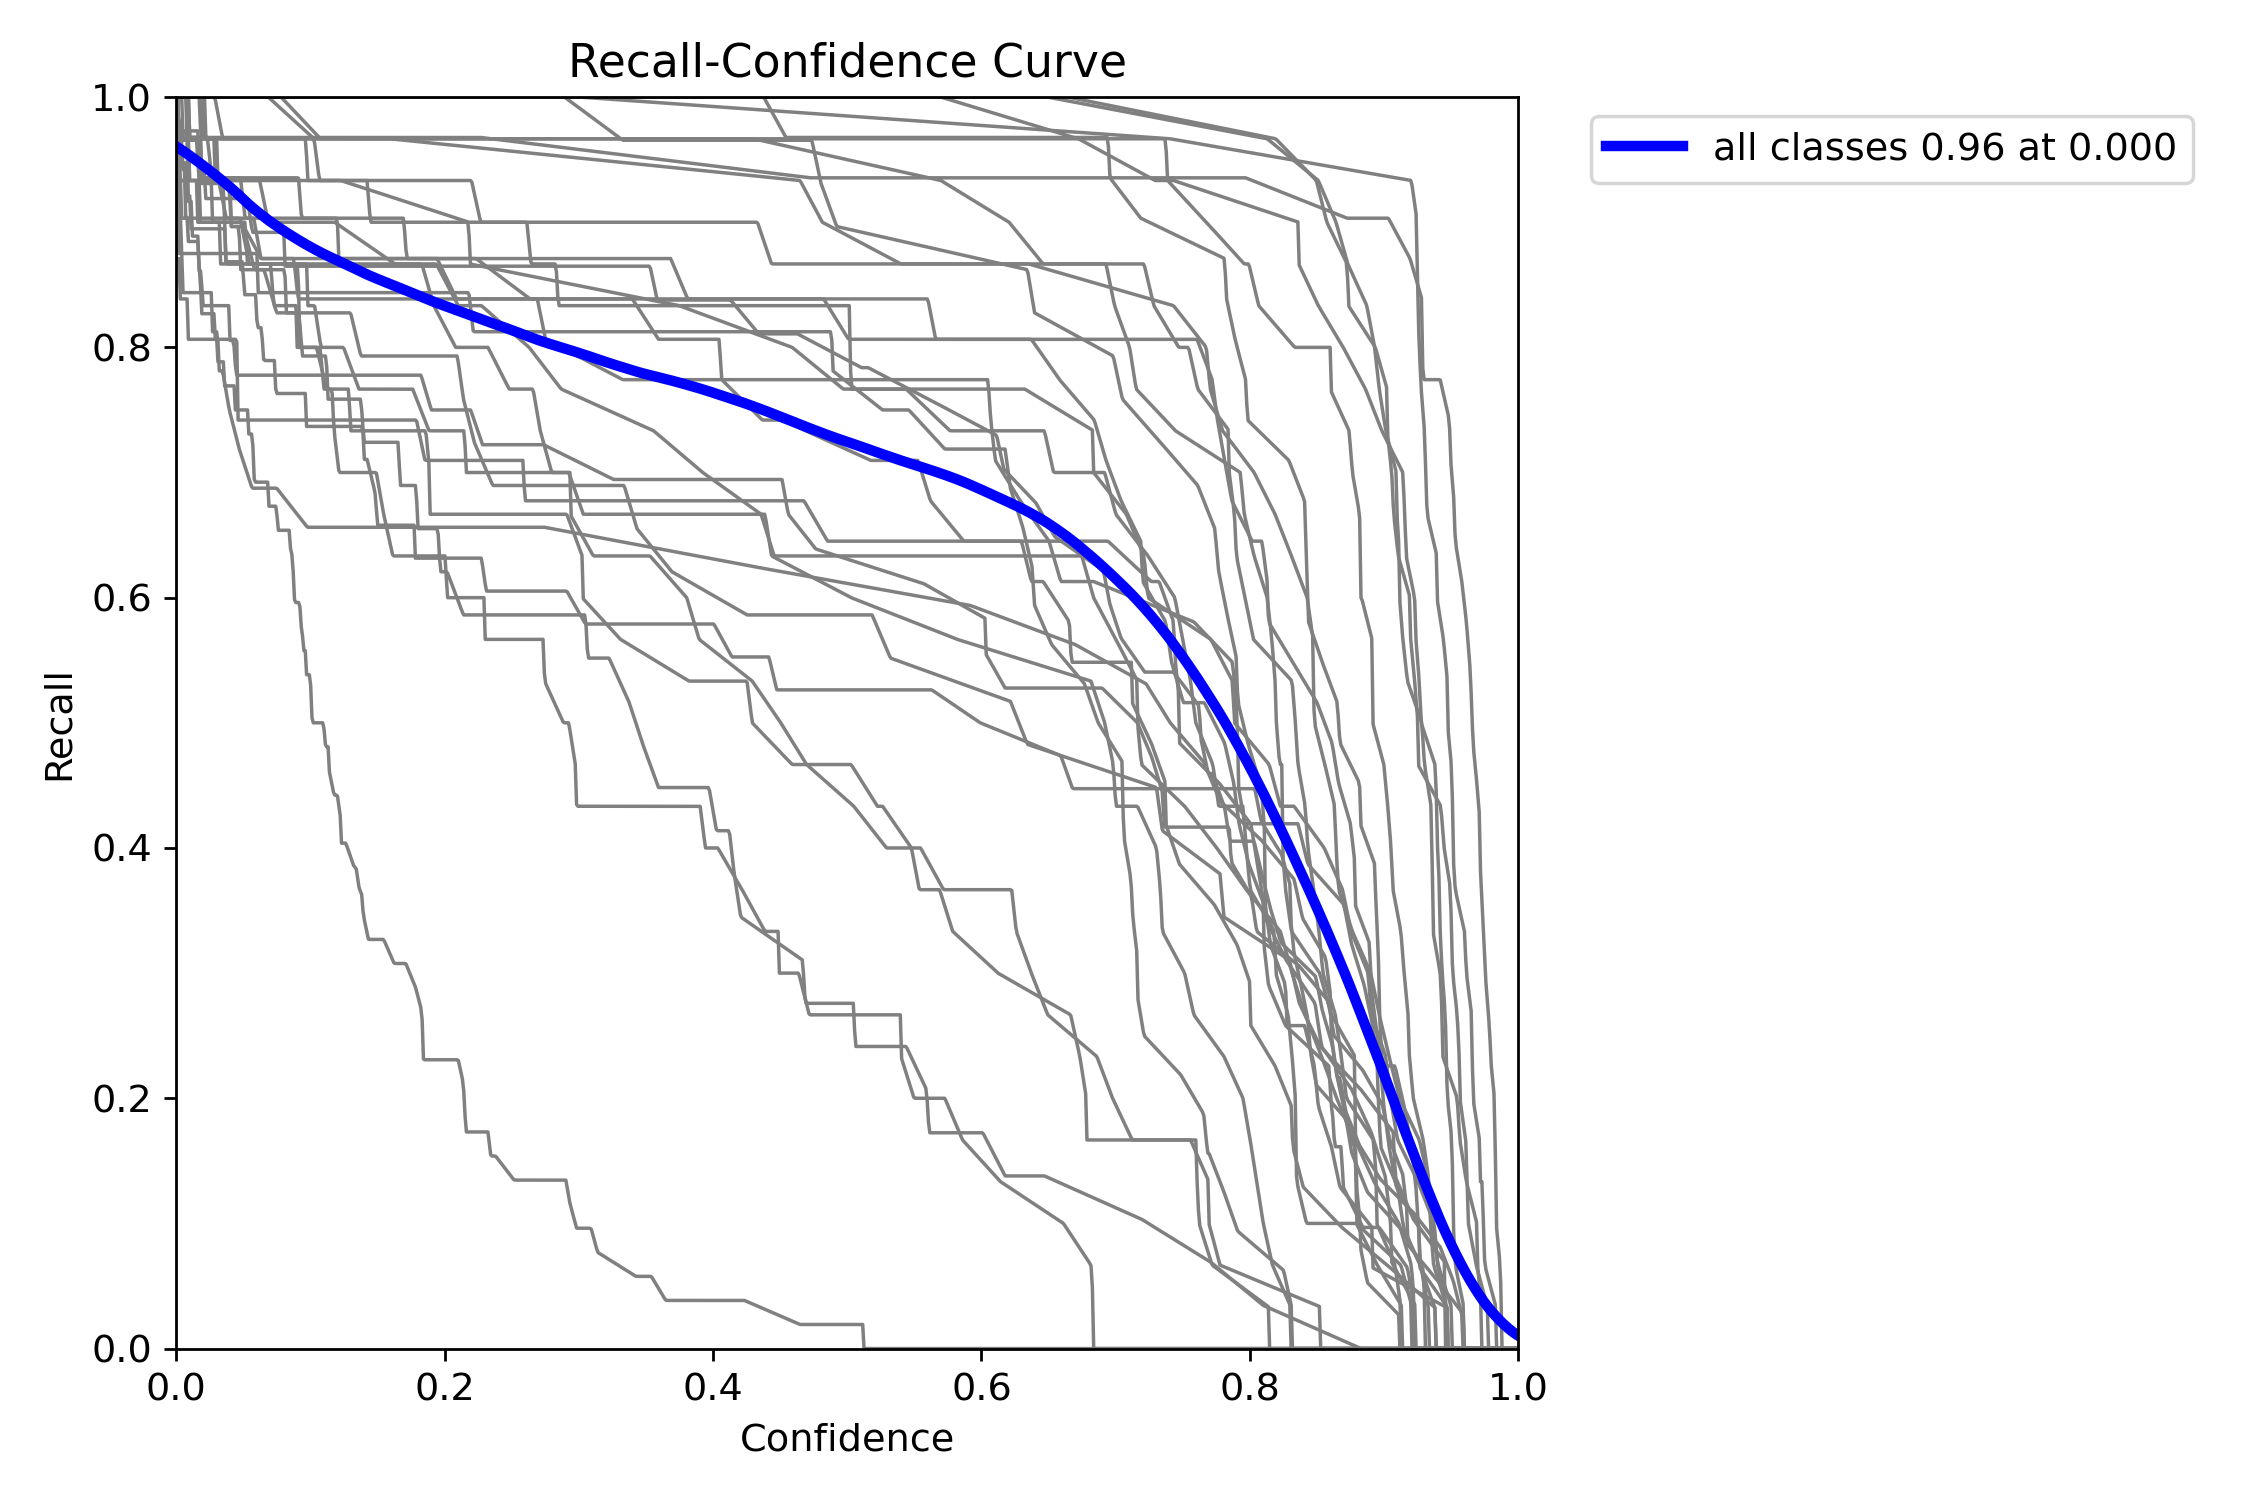

In [12]:
Image("/content/runs/detect/train2/R_curve.png", width=600)

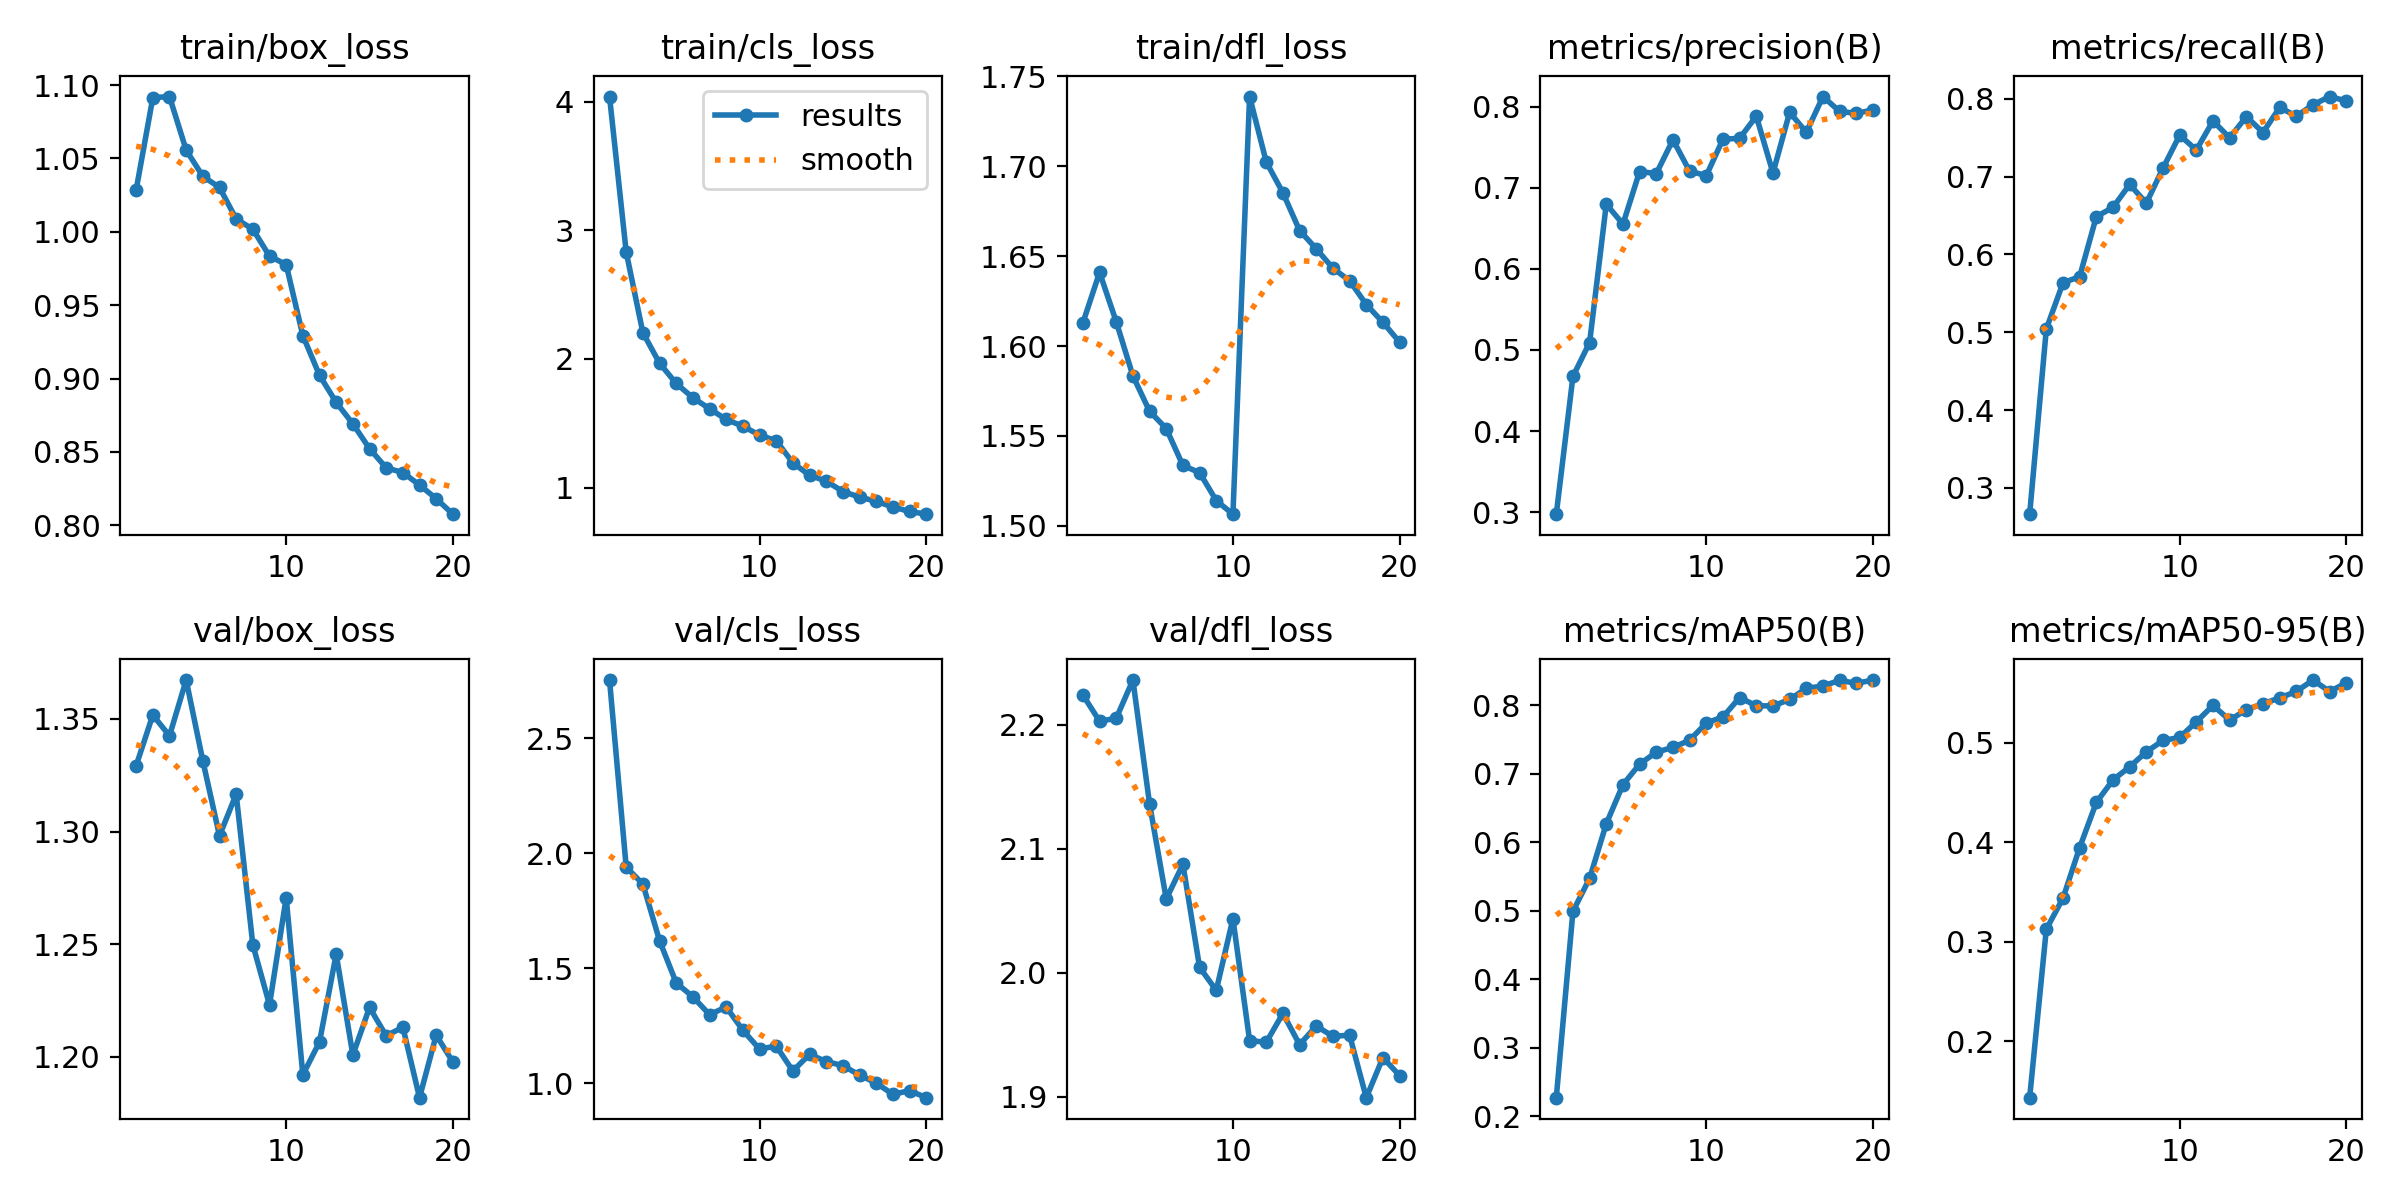

In [13]:
Image("/content/runs/detect/train2/results.png", width=600)


image 1/1 /content/appam.png: 640x640 1 Appam, 8.9ms
Speed: 3.4ms preprocess, 8.9ms inference, 151.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


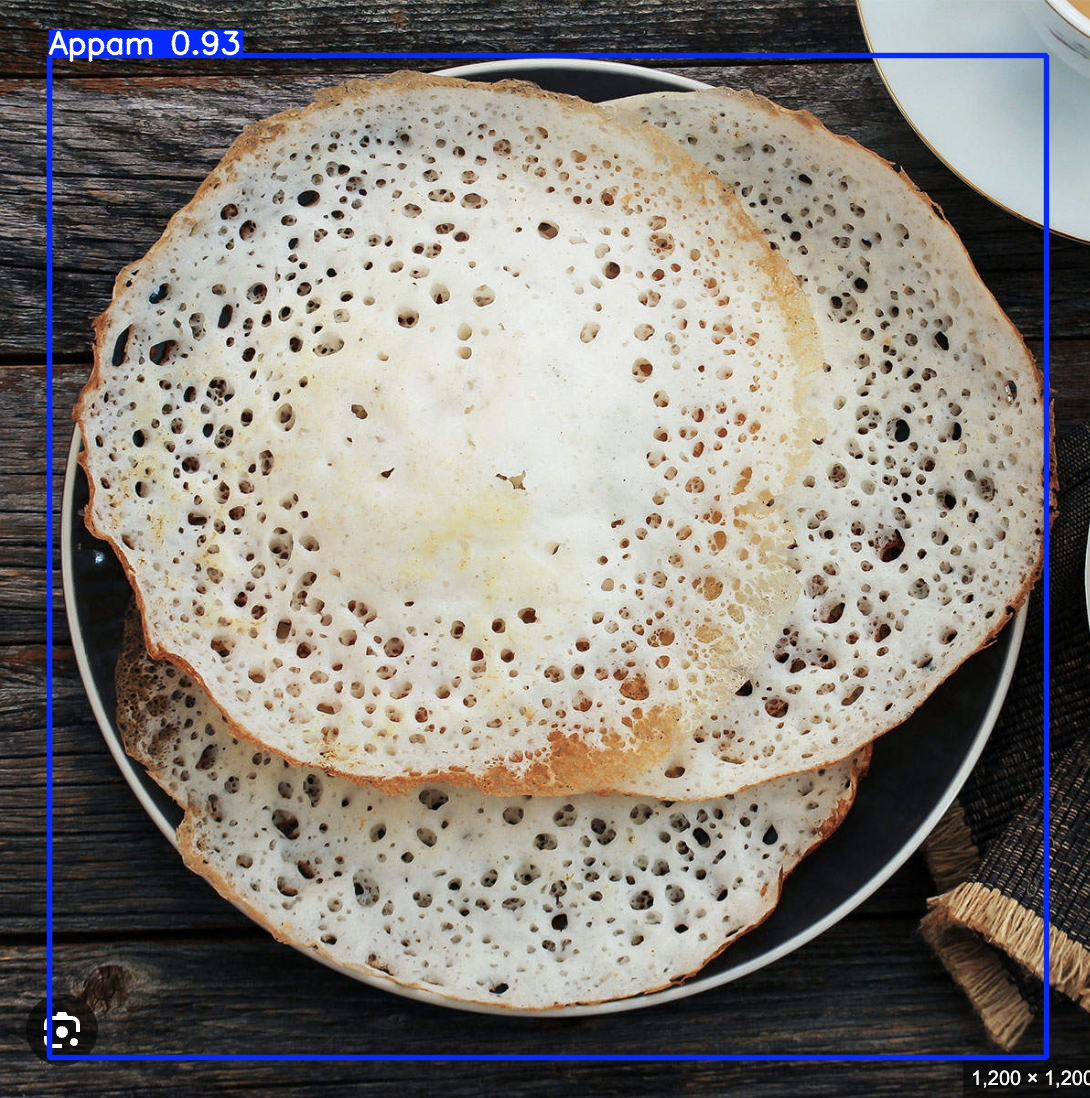

In [14]:

from PIL import Image

# Load trained model
model = YOLO("runs/detect/train2/weights/best.pt")

# Run prediction on an image
results = model.predict(source='/content/appam.png', save=True, conf=0.5)

# Show result image with boxes
for result in results:
    result.show()   # opens window with image & predictions



image 1/1 /content/chicken65.png: 448x640 1 Chicken 65, 68.9ms
Speed: 3.7ms preprocess, 68.9ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


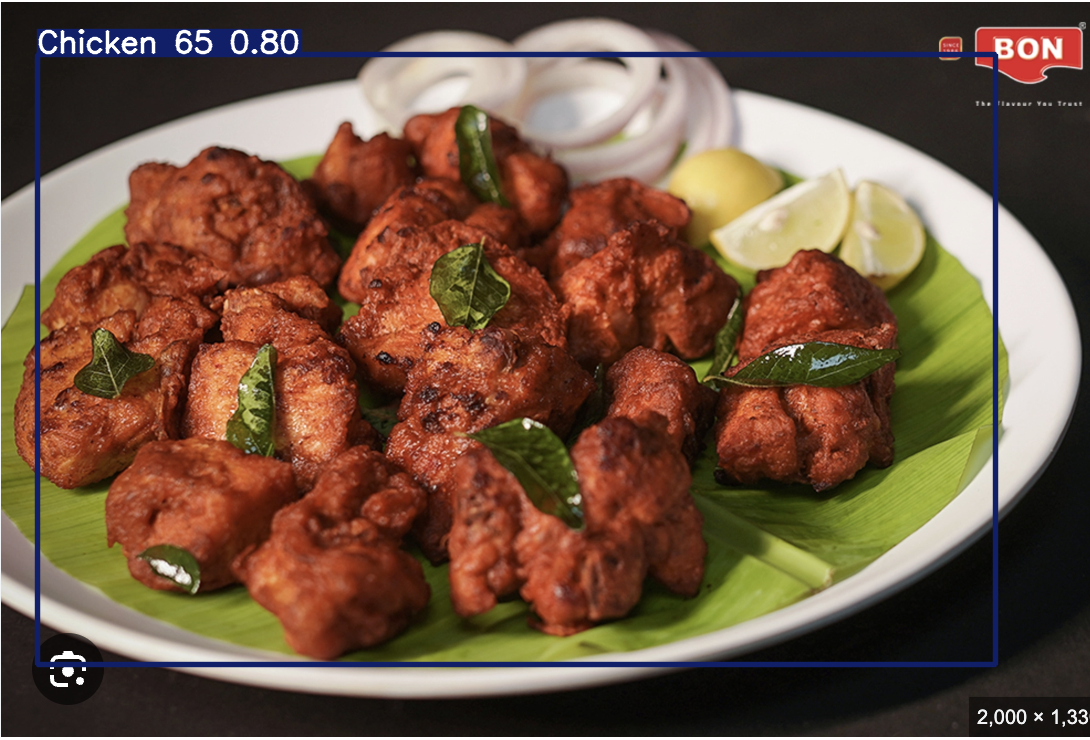

In [18]:
results = model.predict(source='/content/chicken65.png', save=True, conf=0.5)

for result in results:
    result.show()